# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>

## Download: http://github.com/dsacademybr

## SciPy

Para compreender o SciPy é necessário compreender conceitos avançados de Matemática e Estatística, o que está fora do escopo deste treinamento. Caso queira aprender aplicações práticas do pacote em Machine Learning e IA, consulte estes dois cursos aqui na DSA:

Machine Learning: https://www.datascienceacademy.com.br/pages/curso-machine-learning

Programação Paralela em GPU: https://www.datascienceacademy.com.br/pages/curso-programacao-paralela-em-gpu

### O SciPy possui um conjunto de pacotes para operações matemáticas e científicas

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Pacote</strong></td>
			<td><strong>Descrição</strong></td>
		</tr>
		<tr>
			<td><code>cluster</code></td>
			<td>Clustering algorithms</td>
		</tr>
		<tr>
			<td><code>constants</code></td>
			<td>Mathematical and physical constants</td>
		</tr>
		<tr>
			<td><code>fftpack</code></td>
			<td>Fourier transforms</td>
		</tr>
		<tr>
			<td><code>integrate</code></td>
			<td>Numerical integration</td>
		</tr>
		<tr>
			<td><code>interpolate</code></td>
			<td>Interpolation</td>
		</tr>
		<tr>
			<td><code>io</code></td>
			<td>Input and output</td>
		</tr>
		<tr>
			<td><code>linalg</code></td>
			<td>Linear algebra</td>
		</tr>
		<tr>
			<td><code>maxentropy</code></td>
			<td>Maximum entropy models</td>
		</tr>
		<tr>
			<td><code>misc</code></td>
			<td>Miscellaneous</td>
		</tr>
		<tr>
			<td><code>ndimage</code></td>
			<td>Multi-dimensional image processing</td>
		</tr>
		<tr>
			<td><code>odr</code></td>
			<td>Orthogonal distance regression</td>
		</tr>
		<tr>
			<td><code>optimize</code></td>
			<td>Optimization</td>
		</tr>
		<tr>
			<td><code>signal</code></td>
			<td>Signal processing</td>
		</tr>
		<tr>
			<td><code>sparse</code></td>
			<td>Sparse matrices</td>
		</tr>
		<tr>
			<td><code>spatial</code></td>
			<td>Spatial algorithms and data structures</td>
		</tr>
		<tr>
			<td><code>special</code></td>
			<td>Special functions</td>
		</tr>
		<tr>
			<td><code>stats</code></td>
			<td>Statistical functions</td>
		</tr>
		<tr>
			<td><code>stsci</code></td>
			<td>Image processing</td>
		</tr>
		<tr>
			<td><code>weave</code></td>
			<td>C/C++ integration</td>
		</tr>
	</tbody>
</table>


In [6]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


## Processamento de imagens

In [7]:
from scipy import misc
misc.imread('Matplotlib-Mapa.png')    

# Matplotlib tem uma função similar
import matplotlib.pyplot as plt
plt.imread('Matplotlib-Mapa.png')    

AttributeError: module 'scipy.misc' has no attribute 'imread'

## Integração Numérica

In [8]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [9]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [10]:
from scipy.integrate import odeint, ode

In [11]:
from pylab import *
%matplotlib inline

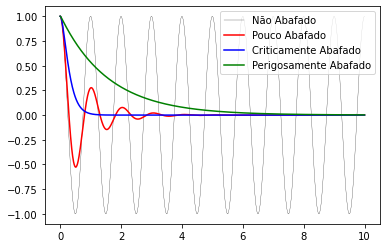

In [12]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

## Fourier Transformation

In [13]:
from scipy.fftpack import *

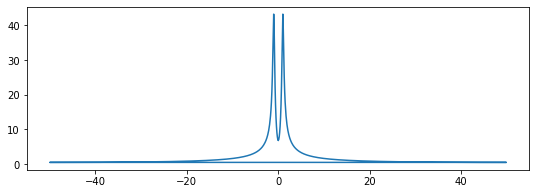

In [14]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Álgebra Linear

In [15]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [16]:
# Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([-0.23333333,  0.46666667,  0.1       ])

In [17]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([1.48171338, 0.30554534, 0.13368361])

In [18]:
evecs

array([[-0.5416658 , -0.60633598, -0.04003276],
       [-0.63758454,  0.76221505, -0.96496175],
       [-0.54779935,  0.22668236,  0.25931874]])

In [19]:
svd(A)

(array([[-0.53483568,  0.83050164, -0.15562076],
        [-0.61893312, -0.5104474 , -0.59696335],
        [-0.57521525, -0.22295845,  0.78703046]]),
 array([1.67750585, 0.33861975, 0.10654712]),
 array([[-0.5213917 , -0.23740516, -0.81962765],
        [ 0.83901245, -0.31776555, -0.4416822 ],
        [-0.15559181, -0.91796723,  0.3648662 ]]))

### Otimização

In [20]:
from scipy import optimize

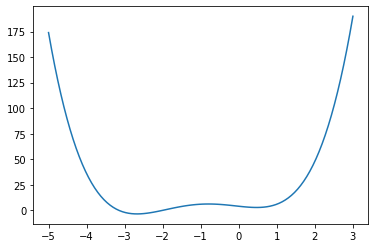

In [21]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [22]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

### Estatística

In [23]:
from scipy import stats

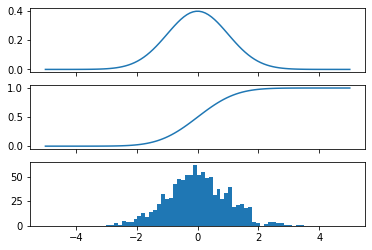

In [24]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [25]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [26]:
# T-test
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(0.26518567018825134, 0.7908937892458892)

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>